In [1]:
import pandas as pd 
import numpy as np
import matplotlib as mtp
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist #data for image classifier
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
#Normalizing the values as every pixle has values from 0-255
X_train = X_train/255.0
X_test = X_test/255.0

#we can also split data in validation data to optimise our model as here 5000 images fir validation and remaining 55000 for training
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:] 

In [5]:
#there are two model architecture creation API in keras
# 1 sequential API
# 2 Functional

#setting rendom seeds which is used to replicate same result everytime we can use any number infuture 
#with that number wee will get same output in the feture
#it will aslo help to produce same result using same initioal weights everytime
np.random.seed(42)
tf.random.set_seed(42)

In [6]:
#now creating a model
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
#to check the model info
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


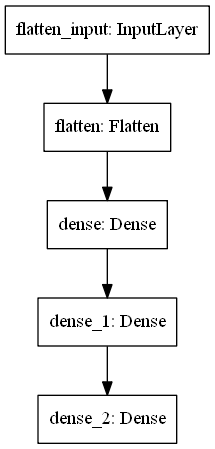

In [7]:
#if want to look at our NN 
import pydot
keras.utils.plot_model(model) #to plot NN structure

In [8]:
weights, biases = model.layers[1].get_weights()
#weights #to ckeck rendom weights
#biases #to ckeck random biases

In [9]:
#compiling our model and defining loss function and optimization
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

In [10]:
#training our model
model_train = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))
#if we run this again then out model will train further where it was stoped training

Train on 55000 samples, validate on 5000 samples
Epoch 1/50
55000/55000 [==============================] - 7s 127us/sample - loss: 0.7228 - accuracy: 0.7623 - val_loss: 0.5304 - val_accuracy: 0.8162
Epoch 2/50
55000/55000 [==============================] - 6s 109us/sample - loss: 0.4837 - accuracy: 0.8321 - val_loss: 0.4498 - val_accuracy: 0.8444
Epoch 3/50
55000/55000 [==============================] - 6s 116us/sample - loss: 0.4379 - accuracy: 0.8472 - val_loss: 0.4172 - val_accuracy: 0.8552
Epoch 4/50
55000/55000 [==============================] - 6s 107us/sample - loss: 0.4126 - accuracy: 0.8554 - val_loss: 0.3900 - val_accuracy: 0.8650
Epoch 5/50
55000/55000 [==============================] - 6s 111us/sample - loss: 0.3928 - accuracy: 0.8627 - val_loss: 0.3957 - val_accuracy: 0.8624
Epoch 6/50
55000/55000 [==============================] - 6s 109us/sample - loss: 0.3775 - accuracy: 0.8669 - val_loss: 0.3735 - val_accuracy: 0.8742
Epoch 7/50
55000/55000 [===========================

<function matplotlib.pyplot.show(close=None, block=None)>

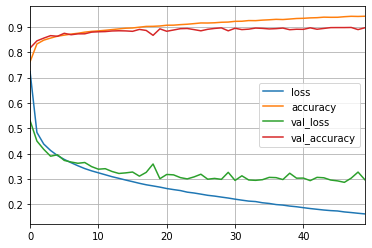

In [11]:
#to check out model perameters 
model_train.params
#to ckeck the model training data
model_train.history
#plotting graph of our accuracy and losses
pd.DataFrame(model_train.history).plot()
plt.grid(True)
plt.show
#as we can see the loss has decresed after 30 epoch(times traning) and accuracy is improved

In [12]:
#now checking our model's acuracy
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.331056494230032, 0.8887]

In [13]:
#now as we dont have any data to predect so making input data
X_new = X_test[:3]

In [14]:
#to predict probability
prediction = model.predict(X_new)
prediction.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [15]:
#to predict class
prediction = model.predict_classes(X_new)
prediction

array([9, 2, 1], dtype=int64)

In [16]:
#classnames
np.array(class_names)[prediction]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

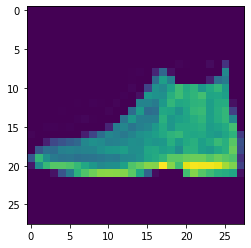

In [17]:
#to conferm with image
plt.imshow(X_new[0])

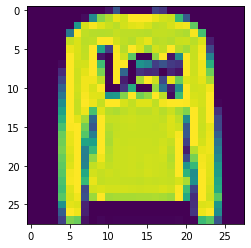

In [18]:
plt.imshow(X_new[1])

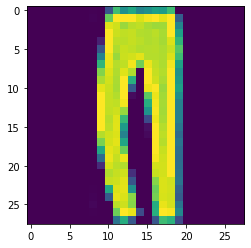

In [19]:
plt.imshow(X_new[2])